# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [54]:
!pip install catboost

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
from pandas.core.common import SettingWithCopyWarning

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from scipy import stats as st

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

В первую очередь откроем таблицы и выведем 5 первых строк.

In [56]:
train=pd.read_csv('/content/gold_recovery_train_new.csv') 
test=pd.read_csv('/content/gold_recovery_test_new.csv') 
full=pd.read_csv('/content/gold_recovery_full_new.csv')

In [57]:
display (train.head())
display (full.head())
display (test.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Проверим, какие столбцы есть в 3 таблицах. Уже изначально видим, что в датафрейме "test" столбцов меньше (52), в то время как в остальных двух таблицах по 86 столбцов. В дальнейшем будет необходимо проверить, какие столбцы отсутствуют в "test"

In [58]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [61]:
train_cols = train.columns
test_cols = test.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)
train_not_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe


Вывели на экран столбцы, которые отсутствуют в таблице "test". Всего их 34
В тестовой выборке отсуствуют столбцы на этапах: final.output.concentrate_, rougher.output, rougher.output.concentrate_, final.output, primary_cleaner.output и secondary_cleaner.output.
Обратим внимание, что признаки этапа "final", "primary_cleaner", "rougher", "secondary_cleaner" относятся к параметрам продукта. Также на многих этапах отсутствует информация о доле металлов


In [62]:
tables = [train, test, full]
for table in tables:
    report = table.isna().sum().to_frame()
    report = report.rename(columns={0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / table.shape[0]).round(2)
    print (report.sort_values(by='missing_values', ascending=False))
    

                                          missing_values  % of total
secondary_cleaner.output.tail_sol                   1605        0.11
rougher.state.floatbank10_e_air                      436        0.03
rougher.input.floatbank11_xanthate                   428        0.03
primary_cleaner.output.concentrate_sol               286        0.02
secondary_cleaner.state.floatbank2_a_air             217        0.02
...                                                  ...         ...
rougher.output.concentrate_pb                          0        0.00
rougher.output.concentrate_au                          0        0.00
rougher.output.recovery                                0        0.00
rougher.output.tail_pb                                 0        0.00
date                                                   0        0.00

[87 rows x 2 columns]
                                            missing_values  % of total
rougher.input.floatbank11_xanthate                      25         0.0
rougher

Вывел на экран количество пропусков. Дальше, во время обучения можели будет необходимо решить, стоит ли убрать пропуски или воспользоваться методом ffill. 

In [63]:
train = train.dropna()
test = test.dropna()
full = full.dropna()

In [64]:
train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [65]:
test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [66]:
full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [67]:
pd.options.mode.chained_assignment=None 
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
C = train["rougher.output.concentrate_au"]
F = train["rougher.input.feed_au"]
T = train["rougher.output.tail_au"]
train["rougher.recovery.count"] = (C * (F - T)) / (F * (C - T)) * 100
count = pd.DataFrame(train["rougher.recovery.count"])
print('Значение MAE =', mean_absolute_error(train["rougher.output.recovery"], train["rougher.recovery.count"]))


Значение MAE = 9.82970122149377e-15


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Верно, молодец)
</div>

In [68]:
count

,rougher.recovery.count
0,87.107763
1,86.843261
2,86.842308
3,87.226430
4,86.688794
...,...
14144,89.574376
14145,87.724007
14146,88.890579
14147,89.858126


Пропишем формулу эффективности обогащения. Для этого возьмем 3 параметра золота из таблицы "train". После этого вычислим Абсолютную среднюю ошибку (MAE) для исходных и рассчитанных нами значений.

Мы видим, что показатель ошибки очень мал, а значит расхождения почти незаметны и вычисления корректны

In [69]:
train = train.merge(full[['date']], how='left', on='date')
test = test.merge(
    full[['date', 'rougher.output.recovery', 'final.output.recovery']],
     how='left', on='date'
     )

In [70]:
test = test.dropna()

In [71]:
test_rougher = test[['rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level', 'rougher.output.recovery']]
column_test = test_rougher.columns
train_rougher = train[column_test]

 М ы столкнулись с тем, что у нас будет два таргета: 'rougher.output.recovery','final.output.recovery'. Согласно процессу, флотационное обогащение идет перед финальным обогащением. Для того, чтобы предсказать эффективность флотации необходимы только признаки "rougher", для финального обогащения понадобятся все признаки в нашей выборке. Для этого создадим в train и test отдельно новые таблицы, в которых будут содержаться только признаки rougher, в тестовую часть добавим целевой признак 'rougher.output.recovery'.  

In [72]:
display(test_rougher.head())
display(train_rougher.head())

,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,...,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.output.recovery
0,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,...,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,89.993421
1,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,...,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,88.089657
2,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,...,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,88.412756
3,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,...,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986,87.360133
4,4.767383,488.248117,63.315324,41.269161,11.290425,13.607257,5.738081,13.650053,5.739634,996.541302,...,-399.511519,1306.455515,-399.050685,1248.699349,-400.876894,1058.839106,-398.988239,949.645313,-399.277632,83.236367


,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,...,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.output.recovery
0,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,...,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,87.107763
1,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,...,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,86.843261
2,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,...,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,86.842308
3,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,999.814770,...,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835,87.226430
4,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,999.678690,...,-449.599614,1600.357732,-450.034364,1599.759049,-449.909799,1401.560902,-448.877187,1401.160227,-450.407128,86.688794


### Вывод по первой главе

Мы рассмотрели 3 таблицы. В данных присутствует большое количество пропусков, дальше будет необходимо решить, заполнять их или полностью удалить обозначили расхождения в количестве столбцов. На первый взгляд мы видим, что в таблице test у нас отсутствуют признаков output. Мы можем предположить, что это целевые признаки, дальнейшие отличия будут рассмотрены ниже. Также прописали формулу обогащения и вычислили показатель MAE

## Анализ данных

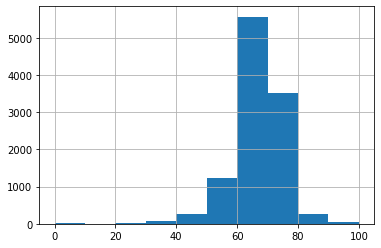

In [73]:
train['final.output.recovery'].hist()
plt.show()

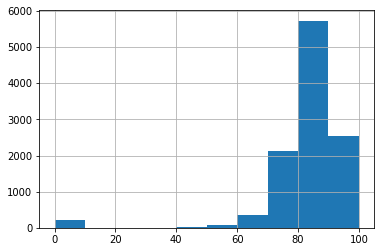

In [74]:
train['rougher.output.recovery'].hist()
plt.show()

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

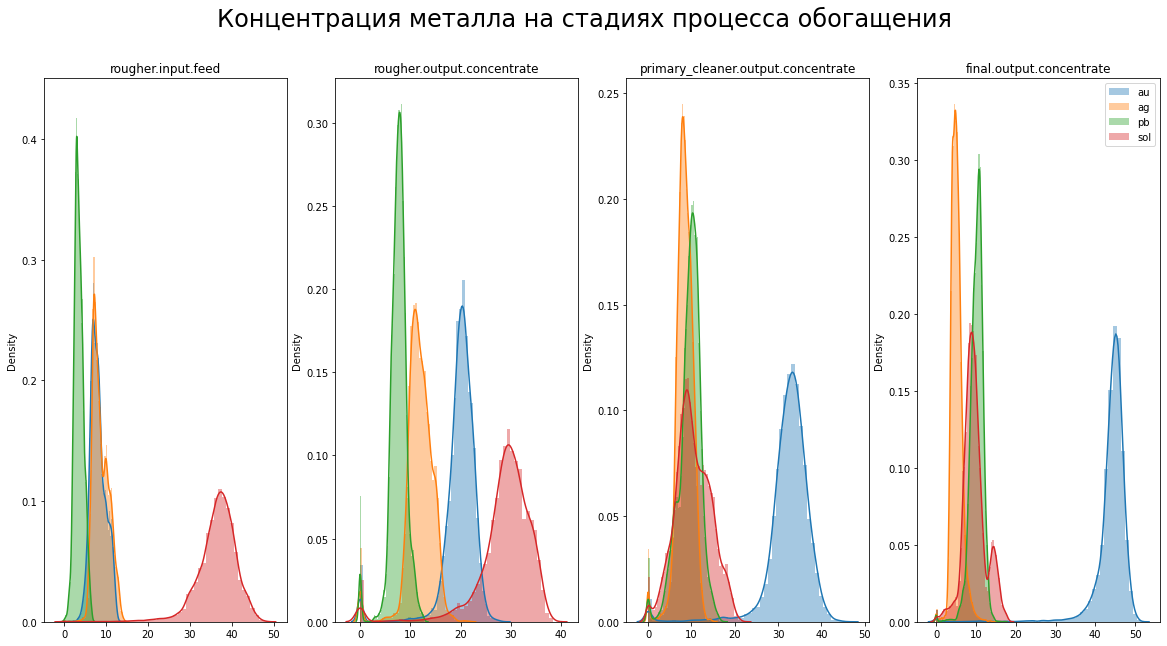

In [75]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate'
          ]
metals = ['au', 'ag', 'pb','sol']

fig, axs = plt.subplots(1, len(process), figsize=(20, 10))
fig.suptitle('Концентрация металла на стадиях процесса обогащения', fontsize=24)

for level, ax in zip(process, axs):
    ax.set_title(level)
    for metal in metals:        
        cols = train.columns.str.contains(level + '_' + metal)
        sns_ax = sns.distplot(train.loc[:, cols].dropna(), label=metal, ax=ax)    
plt.legend()
plt.show()

Для того, чтобы найти концетрацию металлов будет необходимо составить график. Для этого создадим функцию, в которой мы поместим в одну часть все доступные металлы + соли металлов, в другую - этапы процесса, после этого методом for создадим 4 графика, на которых будет отображена концетрация каждого из металлов.

Из графиков мы видим следующее:
- доля золота увеличивается после процесса флотации, самая большая доля в финальном концетрате.
- большая доля нулевых значений на всех этапах
- концентрация свинца и серебра также возрастает на каждом этапе
- доля соли металлов уменьшается 

### Распределение размеров гранул сырья на обучающей и тестовой выборках.


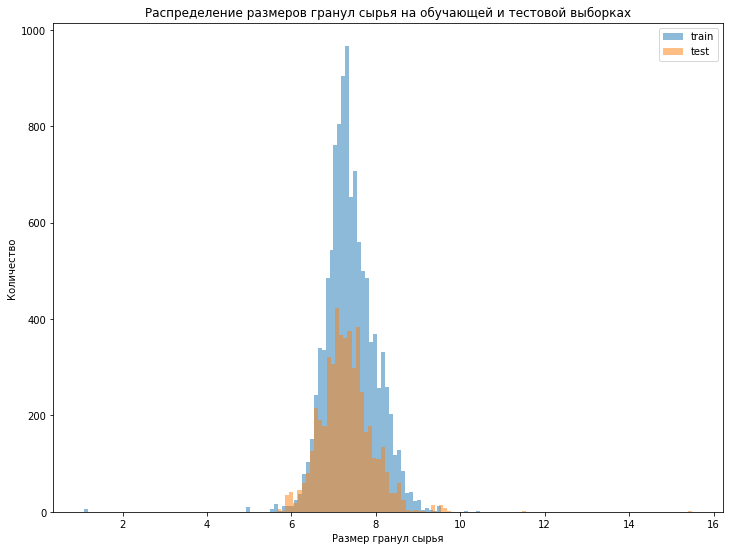

In [76]:
plt.figure(figsize=[12,9])
plt.hist(train['primary_cleaner.input.feed_size'], bins=100, label='train', alpha=.5)
plt.hist(test['primary_cleaner.input.feed_size'], bins=100, label='test', alpha=.5)

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество")

plt.legend(loc='upper right')
plt.title("Распределение размеров гранул сырья на обучающей и тестовой выборках")
plt.show()

In [77]:
display(train['primary_cleaner.input.feed_size'].describe())
display(test['primary_cleaner.input.feed_size'].describe())

count    11017.000000
mean         7.396036
std          0.575317
min          1.080000
25%          7.030000
50%          7.323334
75%          7.740000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

count    5077.000000
mean        7.290766
std         0.592991
min         5.650000
25%         6.910000
50%         7.260000
75%         7.620000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

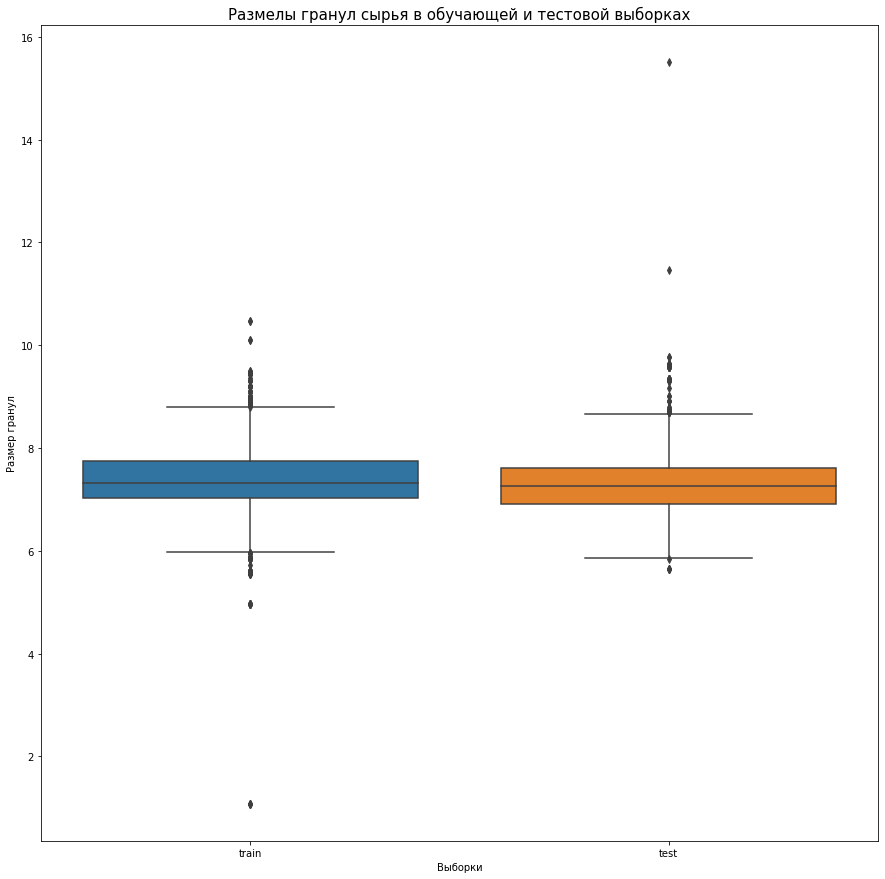

In [78]:
df = pd.concat([train['primary_cleaner.input.feed_size'], test['primary_cleaner.input.feed_size']], axis=1)
df.columns = ['train', 'test']  
plt.figure(figsize=(15,15))
sns.boxplot(data=df)
plt.title('Размелы гранул сырья в обучающей и тестовой выборках', fontsize=15)
plt.ylabel('Размер гранул')
plt.xlabel('Выборки')
plt.show()

Сформулируем две гипотезы для сравнения распределений гранул сырья.
H_0 - Средние значения двух генеральных совокупностей из данных test и train равны

H_1 - Среднее значения двух генеральных совокупностей из данных test и train различаются.

Критерий значимости - 0.05. Также мы можем предположить, что данные выборки были взяты из похожих генеральный совокупностей, следовательно критерий для equal_var поставим True

In [79]:
a = train['primary_cleaner.input.feed_size']
b = test['primary_cleaner.input.feed_size']

alpha = 0.05

result = st.ttest_ind(a, b, equal_var=True)

print('p-значение:', result.pvalue)


if (result.pvalue > alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 1.5113395762675688e-26
Отвергаем нулевую гипотезу


Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Для этого построим график. Из графика мы видим, что распределения почти не отличаются отличаются друг от друга

 Для точной проверки также вывел основные статистические данные, такие как процентиль, среднее значение, стандартное отклонение. Мы видим что среднее значение и медиана почти совпадают в выборках, и в связи с этим можно утверждать что они являются схожими. Кроме того, построил ящик с усами, на котором видно что большинство гранул test и train лежат в одинаковом интервале.
Однако, чтобы проверить себя, зашел также в предыдущие работы, попробовал сравнить распределения с помощью статистических значимости. Тест показал, что мы должны отвергнуть нулевую гипотезу. Однако, считаю, что гистограмма и график наглядно показывают, что распределения в целом похожи. 


### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


Для начала рассмотрим целевые признаки rougher.output.recovery и final.output.recovery. Из данных мы видим, что присутствует большое количество нулевых значений

In [80]:
train['rougher.output.recovery'].value_counts()

0.000000      205
100.000000      5
91.636690       4
75.915059       1
76.446504       1
             ... 
70.676320       1
66.282309       1
60.396106       1
69.024551       1
89.514960       1
Name: rougher.output.recovery, Length: 10806, dtype: int64

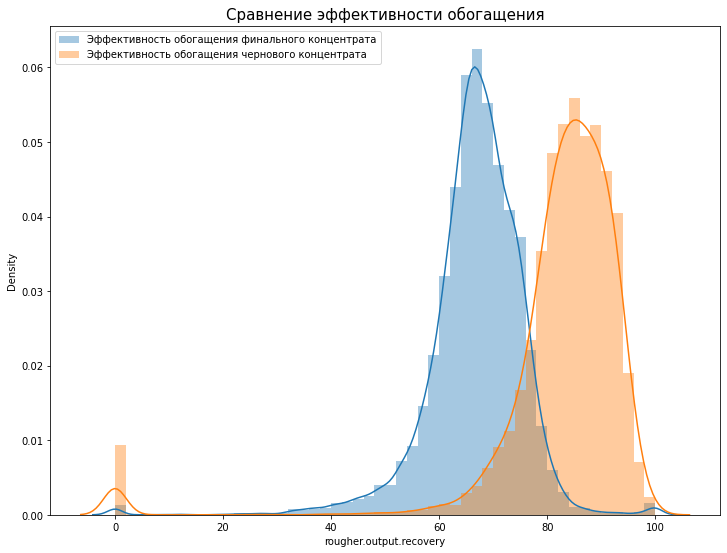

In [81]:
plt.figure(figsize = [12,9])
sns.distplot(train['final.output.recovery'], label='Эффективность обогащения финального концентрата')
sns.distplot(train['rougher.output.recovery'], label='Эффективность обогащения чернового концентрата')
plt.title('Сравнение эффективности обогащения', fontsize=15)
plt.legend()
plt.show()

In [82]:
display(train['final.output.recovery'].describe)
display(train['rougher.output.recovery'].describe)      

<bound method NDFrame.describe of 0        70.541216
1        69.266198
2        68.116445
3        68.347543
4        66.927016
           ...    
11012    73.755150
11013    69.049291
11014    67.002189
11015    65.523246
11016    70.281454
Name: final.output.recovery, Length: 11017, dtype: float64>

<bound method NDFrame.describe of 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
11012    89.574376
11013    87.724007
11014    88.890579
11015    89.858126
11016    89.514960
Name: rougher.output.recovery, Length: 11017, dtype: float64>

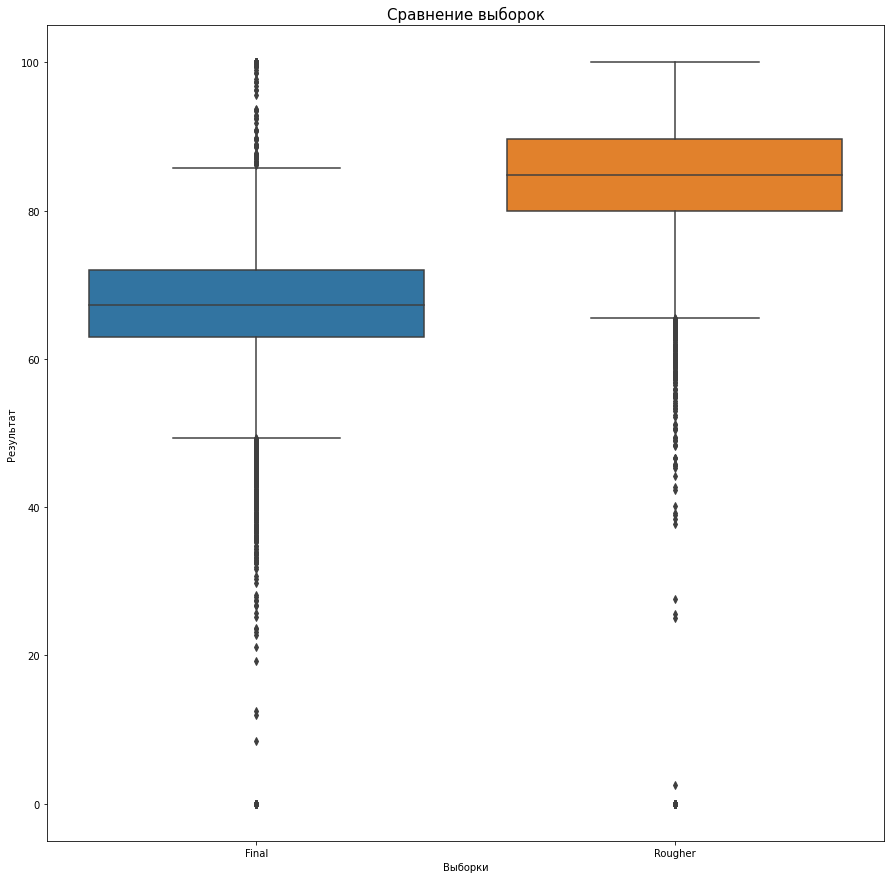

In [83]:
df = pd.concat([train['final.output.recovery'], train['rougher.output.recovery']], axis=1)
df.columns = ['Final', 'Rougher']  
plt.figure(figsize=(15,15))
sns.boxplot(data=df)
plt.title('Сравнение выборок', fontsize=15)
plt.ylabel('Результат')
plt.xlabel('Выборки')
plt.show()

По распределению видно, что в обоих столбцах есть значения, которые равны 0. Мы удалим нулевые значения, чтобы модель не запоминала только нулевую эффективность

 Построил также боксплоты, из которых мы видим, что есть значения которые находятся за границей распределения и стремятся к 0. Мне кажется лучше всего взять пороговое значение равное 30. Если мы просто удалим 0, то, проверил, результат моделей не изменяется, посмотрим, что случится при удалении результатов ниже 30


In [84]:
train_new = train[train['rougher.output.recovery'] > 30]

In [85]:
train = train_new[train_new['final.output.recovery'] > 30]

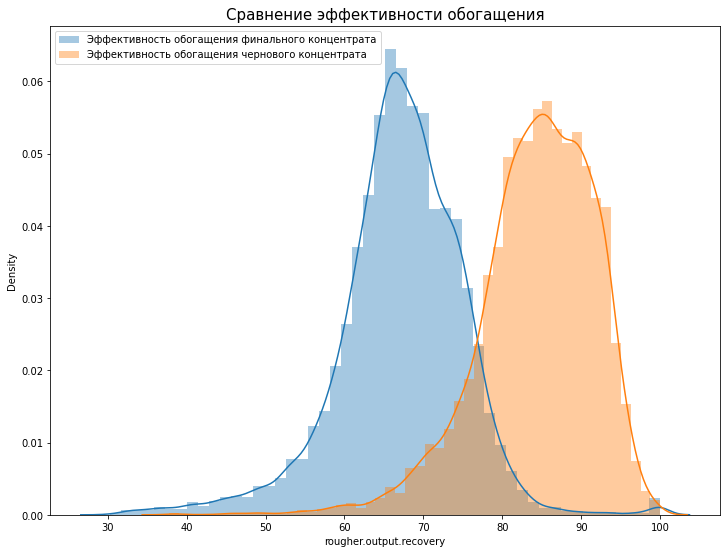

In [86]:
plt.figure(figsize = [12,9])
sns.distplot(train['final.output.recovery'], label='Эффективность обогащения финального концентрата')
sns.distplot(train['rougher.output.recovery'], label='Эффективность обогащения чернового концентрата')
plt.title('Сравнение эффективности обогащения', fontsize=15)
plt.legend()
plt.show()

In [87]:
pd.options.mode.chained_assignment = None 
train['sum_roug_out_con'] = (train['rougher.output.concentrate_au'] + 
                    train['rougher.output.concentrate_ag'] + 
                    train['rougher.output.concentrate_pb'] +
                    train['rougher.output.concentrate_sol'])
train['sum_sec_cleaner_out'] = (train['secondary_cleaner.output.tail_ag'] + 
                       train['secondary_cleaner.output.tail_pb'] +
                       train['secondary_cleaner.output.tail_sol'] +
                       train['secondary_cleaner.output.tail_au'])
train['sum_fin_out_con'] = (train['final.output.concentrate_au'] + 
                    train['final.output.concentrate_ag'] + 
                    train['final.output.concentrate_pb'] +
                    train['final.output.concentrate_sol'])
train['sum_pri_clr_out_con'] = (train['primary_cleaner.output.concentrate_au'] + 
                        train['primary_cleaner.output.concentrate_ag'] + 
                        train['primary_cleaner.output.concentrate_pb'] +
                        train['primary_cleaner.output.concentrate_sol'])

Найдем суммарную концентрацию всех веществ на разных стадиях (в сырье, в черновом и финальном концентратах) путем сложения концетрации каждого из металлов. Дальше на основе полученных данных сооздадим график

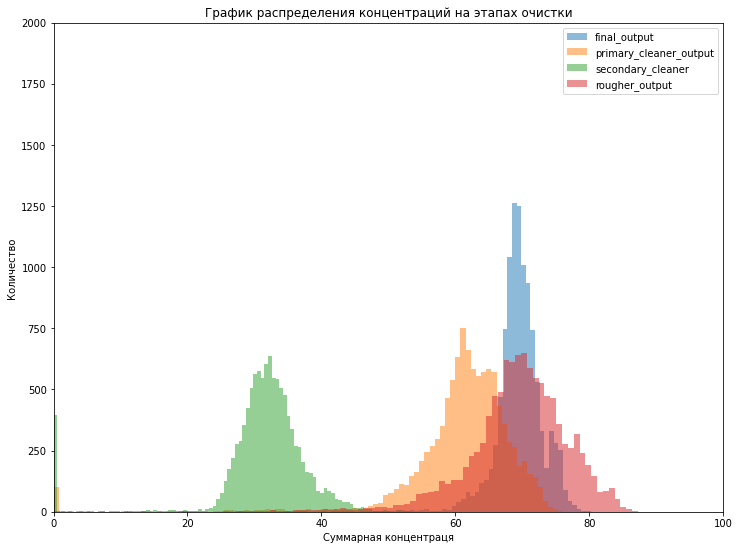

In [88]:
plt.figure(figsize=[12,9])
plt.hist(train['sum_fin_out_con'], bins=100, label='final_output', alpha=.5)
plt.hist(train['sum_pri_clr_out_con'], bins=100, label='primary_cleaner_output', alpha=.5)
plt.hist(train['sum_sec_cleaner_out'], bins=100, label='secondary_cleaner', alpha=.5)
plt.hist(train['sum_roug_out_con'], bins=100, label='rougher_output', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 2000])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество")

plt.legend(loc='upper right')
plt.title("График распределения концентраций на этапах очистки")
plt.show()

На графике мы видим, что большое количесвто значений лежат на отметке 0. Для того, чтобы подробнее изучить данные уменьшим наш график, также уберем период второго этапа очистки, т.к. он по заданию не требуется

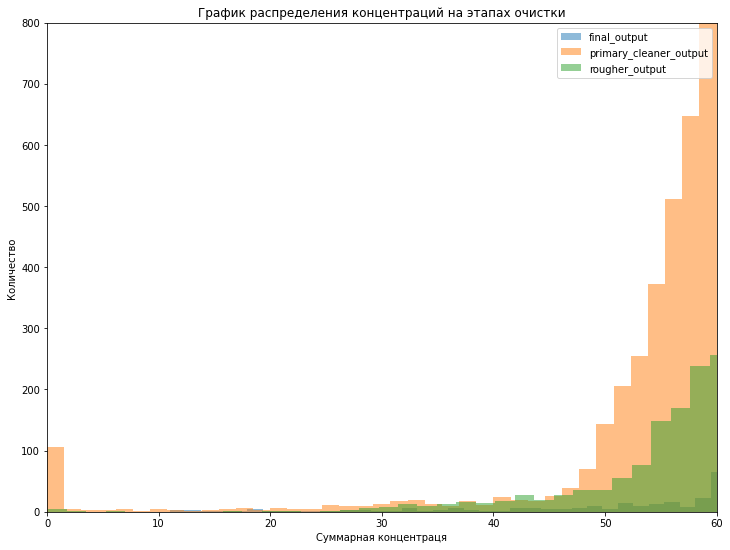

In [89]:
plt.figure(figsize=[12,9])
plt.hist(train['sum_fin_out_con'], bins=50, label='final_output', alpha=.5)
plt.hist(train['sum_pri_clr_out_con'], bins=50, label='primary_cleaner_output', alpha=.5)
plt.hist(train['sum_roug_out_con'], bins=50, label='rougher_output', alpha=.5)

plt.xlim([0, 60])
plt.ylim([0, 800])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество")

plt.legend(loc='upper right')
plt.title("График распределения концентраций на этапах очистки")
plt.show()

В общем, по распределению видно, что на всех стадиях есть выбросы. На графике мы видим, что больше всего нулевых значений на этапе флотации. Есть много значений до 20, которые можно удалить.

In [90]:
train = train.query("sum_roug_out_con != 0 and sum_fin_out_con != 0 and sum_pri_clr_out_con != 0")
train = train.drop(["sum_fin_out_con", "sum_pri_clr_out_con", "sum_roug_out_con"], axis=1)

### Вывод по второй главе

В данной главе мы нашли распределения концентраций металов на стадиях процесса, отметили, что доля золота возрастает с каждым из этапов. Посчитали сумму концентраций металлов после флотации, первичной, вторичной и финальной очистки
Нашли и убрали выбросы из столбов суммарных концентраций, значений которых равны 0

Кроме того, провели работу со сравнением гранул на тестовой и обучающей выборке. Согласно графикам и боксплотам, а также сравнению по основным статистическим показателям, распределения размеров гранул сырья на обучающей и тестовой выборках, несмотря на результаты проверки статистических гипотез. 

## Модель

### Функция для вычисления итоговой sMAPE.

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). Для этого создадим функцию, в которой будет две переменных. Каждая из этих переменных будет содержать два столбца:'rougher.output.recovery' и 'final.output.recovery'.Данную функцию мы будем использовать после обучения моделей. Необходимо помнить, что, чем меньше отклонение, тем лучше результат.

SMAPE = (1/n) * Σ(|actual – forecast| / ((|actual| + |forecast|)/2) * 100

In [91]:
def sMAPE_score(rougher_rec_real, rougher_rec_pred, final_rec_real, final_rec_pred):
    n = rougher_rec_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_rec_real - rougher_rec_pred)/
                     (abs(rougher_rec_real) + abs(rougher_rec_pred))).sum() * 100 / n)
    
    final_sMAPE = ((2*abs(final_rec_real - final_rec_pred)/
                     (abs(final_rec_real) + abs(final_rec_pred))).sum() * 100 / n)
    
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

Здесь мы попробуем использовать два метода борьбы с пропусками: их полное удаление и заполнение. Функция .ffill() используется для заполнения отсутствующего значения в наборе данных. В конце будет создана таблица, в которой сравним результаты

### Обучение разных моделей и оценка их качества кросс-валидацией. .


In [92]:
columns_test = test.columns
train = train[columns_test]

Перед обучением моделей необходимо обозначить признаки и целевой признак. Для этого сначала объединяем таблицы train и test с таблицей full. Целевые признаки - 'rougher.output.recovery','final.output.recovery'. В признаках также убираем столбец даты, который нам не понадобится. После этого мы отбираем в таблицу train только те столбцы, которые есть в таблице test. 

In [93]:
test_final_features = test.drop(['date', 'rougher.output.recovery','final.output.recovery'], axis=1)
test_final_target = test[['final.output.recovery']]

test_rougher_features = test_rougher.drop(['rougher.output.recovery'], axis=1)
test_rougher_target = test_rougher[['rougher.output.recovery']]

train_final_features = train.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
train_final_target = train[['final.output.recovery']]

train_rougher_features = train_rougher.drop(['rougher.output.recovery'], axis=1)
train_rougher_target = train_rougher[['rougher.output.recovery']]

Для каждой из четырех выборок: test, test_rougher, train, train_rougher создали фичи и целевые признаки в соответствии с уровнем процесса. Также удалим столбец data, как признак он не понадобится.

In [94]:
scaler = StandardScaler()
pd.options.mode.chained_assignment = None
train_rougher_features = scaler.fit_transform(train_rougher_features)
test_rougher_features = scaler.transform(test_rougher_features)

In [95]:
train_final_features = scaler.fit_transform(train_final_features)
test_final_features = scaler.transform(test_final_features)

Масштабируем наши признаки, преобразуем обучающую и тестовую выборки функцией .fit_transform(). Избегаем предупреждения SettingWithCopy прописываением внутри функции кода: pd.options.mode.chained_assignment = None

Для решения задач будем использовать следующие модели: Decision Tree, RandomForestRegressor, LinearRegression, Ridge. Сначала ищем гиперпарамтеры моделей методом перебора.

Также внутри используем метод кросс-валидации. Разобьем наши данные на 6 групп.

Так как раньше такую модель не использовал,  в "Регрессе Риджа" попробую использовать различные гиперпараметры:sparse_cg, cholesky, lsqr. На тренировочной выборке результат не сильно отличается, остановимся на параметре, который показал лучший результат: "lsqr"

### RandomForestRegressor 

Перед тем как найти нужную модель в RandomForestRegressor, мы переведем таргеты в array и добавим в сами модели функцию .ravel(). Если этого не сделать, постоянно будет выходить предупреждение о том, что необходимо изменить данные. После каждой проверки будут выводиться лучшие показатели каждой модели. 

In [96]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff)

In [97]:
def smape_final(smape_out_rougher,  y_smape_out_final):
    return 0.25 * smape_out_rougher + 0.75 * y_smape_out_final

In [98]:
smape_score = make_scorer(smape, greater_is_better = True)

In [99]:
train_rougher_target_arr = np.array(train_rougher_target)
train_final_target_arr = np.array(train_final_target)
test_rougher_target_arr = np.array(test_rougher_target)
test_final_target_arr = np.array(test_final_target)

In [100]:
%%time
regr = RandomForestRegressor()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,8,2),
              'random_state':[48]}

reg1 = GridSearchCV(regr, parametrs, cv=4, scoring=smape_score)
reg1.fit(train_rougher_features, train_rougher_target_arr.ravel())
reg1pred = reg1.predict(train_rougher_features)
reg1.best_score_

CPU times: user 2min 3s, sys: 216 ms, total: 2min 3s
Wall time: 2min 11s


In [101]:
%%time
reg2 = GridSearchCV(regr, parametrs, cv=4, scoring=smape_score)
reg2.fit(train_final_features, train_final_target_arr.ravel())
reg2pred = reg2.predict(train_final_features)
reg2.best_score_

CPU times: user 4min 31s, sys: 338 ms, total: 4min 32s
Wall time: 4min 31s


In [102]:
reg1.best_estimator_

RandomForestRegressor(max_depth=1, n_estimators=10, random_state=48)

In [103]:
reg2.best_estimator_

RandomForestRegressor(max_depth=7, n_estimators=10, random_state=48)

In [104]:
final_smape = smape_final(reg1.best_score_, reg2.best_score_)
print('Best smape: ', reg1.best_params_, reg2.best_params_, final_smape)

Best smape:  {'max_depth': 1, 'n_estimators': 10, 'random_state': 48} {'max_depth': 7, 'n_estimators': 10, 'random_state': 48} 0.10741531757992684


    
 В общем долго думал, решил, что можно попробовать следующим способом: вставить в грид сеарч формулу рассчета smape, нашел ее на сайте каггл. Единственное, т.к. у нас разбиты датасеты, мы сначала рассчитываем по данной формуле smape этапа флотации, потом финальной стадии, потом считаем общий. Значение стали в диапозоне от 0 до 1. Кроме того, обозначили лучшие параметры.

In [105]:
forrest_regressor_rougher = RandomForestRegressor(random_state=48, max_depth=1, n_estimators=10)
cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=48)

forrest_regressor_rougher.fit(train_rougher_features, train_rougher_target_arr.ravel())
fina1 = cross_val_score(forrest_regressor_rougher, train_rougher_features, train_rougher_target_arr.ravel(), cv=cv)
forrest_pred_rougher = forrest_regressor_rougher.predict(train_rougher_features)

smape_rougher_forrest = smape(train_rougher_target_arr.ravel(), forrest_pred_rougher)
print('Средняя оценка качества модели:', fina1.mean(), smape_rougher_forrest)

Средняя оценка качества модели: 0.1425050758648547 0.11141878299916697


In [106]:
forrest_regressor_final  = RandomForestRegressor(random_state=48, max_depth=7, n_estimators=10)
cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=48)

forrest_regressor_final.fit(train_final_features, train_final_target_arr.ravel())
fina2 = cross_val_score(forrest_regressor_final, train_final_features, train_final_target_arr.ravel(), cv=cv)
forrest_pred_final = forrest_regressor_final.predict(train_final_features)

smape_final_forrest = smape(train_final_target_arr.ravel(), forrest_pred_final)
forrest_smape = smape_final(smape_rougher_forrest, smape_final_forrest)
print('Средняя оценка качества модели:', fina2.mean())

print('Smape RandomForestRegressor:', forrest_smape)

Средняя оценка качества модели: 0.5094645082155879
Smape RandomForestRegressor: 0.06758554383584817


### Ridge

In [107]:
%%time
ridge = Ridge()
parametrs = {'solver':['auto', 'svd', 'cholesky', 'lsqr'],
              'alpha': range (1,200,10),
            'random_state':[48]}

grid1 = GridSearchCV(ridge, parametrs, cv=4, scoring=smape_score)
grid1.fit(train_rougher_features, train_rougher_target_arr.ravel())
grid1_roug = grid1.predict(train_rougher_features)
grid1.best_score_

CPU times: user 3.68 s, sys: 3.37 s, total: 7.05 s
Wall time: 3.67 s


In [108]:
%%time
grid2 = GridSearchCV(ridge, parametrs, cv=4, scoring=smape_score)
grid2.fit(train_final_features, train_final_target_arr.ravel())
grid2_roug = grid2.predict(train_final_features)
grid2.best_score_

CPU times: user 10.7 s, sys: 10.7 s, total: 21.4 s
Wall time: 11.1 s


In [109]:
print('Лучшие параметры модели: ', grid1.best_params_, grid2.best_params_)

Лучшие параметры модели:  {'alpha': 1, 'random_state': 48, 'solver': 'lsqr'} {'alpha': 1, 'random_state': 48, 'solver': 'lsqr'}


In [110]:
ridge_rougher = Ridge(random_state=48, alpha=1, solver='lsqr')
cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=48)

fina5 = cross_val_score(ridge_rougher, train_rougher_features, train_rougher_target, cv=cv)
ridge_rougher.fit(train_rougher_features, train_rougher_target)
ridge_pred_rougher = ridge_rougher.predict(train_rougher_features)

smape_rougher_ridge = smape(train_rougher_target_arr.ravel(), ridge_pred_rougher)

print('Средняя оценка качества модели для флотации:',fina5.mean())

Средняя оценка качества модели для флотации: 0.18816847691125696


In [111]:
ridge_final = Ridge(random_state=48, alpha=1, solver='lsqr')
cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=48)

fina6 = cross_val_score(ridge_final, train_final_features, train_final_target, cv=cv)
ridge_final.fit(train_final_features, train_final_target)
ridge_pred_final = ridge_final.predict(train_final_features)

smape_final_ridge = smape(train_final_target_arr.ravel(), ridge_pred_final)
ridge_smape = smape_final(smape_rougher_ridge, smape_final_ridge)

print('Средняя оценка качества модели для финальной части:', fina6.mean())
print('Smape Ridge:', ridge_smape)

Средняя оценка качества модели для финальной части: 0.3753594932057859
Smape Ridge: 0.11303956738912369


### LinearRegression


In [112]:
%%time
line = LinearRegression()
parametrs = {'n_jobs': range (1,20,5)}

linear1 = GridSearchCV(line, parametrs, cv=4, scoring=smape_score)
linear1.fit(train_rougher_features, train_rougher_target)
linear1_roug = linear1.predict(train_rougher_features)
linear1.best_score_

CPU times: user 363 ms, sys: 246 ms, total: 609 ms
Wall time: 370 ms


In [113]:
%%time
linear2 = GridSearchCV(line, parametrs, cv=4, scoring=smape_score)
linear2.fit(train_final_features, train_final_target)
linear2_roug = linear2.predict(train_final_features)
linear2.best_score_

CPU times: user 821 ms, sys: 996 ms, total: 1.82 s
Wall time: 1.11 s


In [114]:
print('Лучшие параметры модели: ', linear1.best_params_, linear2.best_params_)

Лучшие параметры модели:  {'n_jobs': 1} {'n_jobs': 1}


In [115]:
line_regression_rougher = LinearRegression(n_jobs=1)
cv = ShuffleSplit(n_splits = 8, test_size=0.3, random_state=48)
fina7 = cross_val_score(line_regression_rougher, train_rougher_features, train_rougher_target, cv=cv)
line_regression_rougher.fit(train_rougher_features, train_rougher_target)
line_rougher_regr = line_regression_rougher.predict(train_rougher_features)
smape_rougher_line = smape(train_rougher_target_arr.ravel(), line_rougher_regr)


line_regression_final = LinearRegression(n_jobs=1)
fina8 = cross_val_score(line_regression_final, train_final_features, train_final_target, cv=cv)
line_regression_final.fit(train_final_features, train_final_target)
line_final_regr = line_regression_final.predict(train_final_features)
smape_final_line = smape(train_final_target_arr.ravel(), line_final_regr)
line_smape = smape_final(smape_rougher_line, smape_final_line)

print('Средняя оценка качества модели для флотации:',fina7.mean())
print('Средняя оценка качества модели для финальной части:',fina8.mean())
print('Smape LinearRegression:', line_smape)

Средняя оценка качества модели для флотации: 0.19051753224502627
Средняя оценка качества модели для финальной части: 0.37689942256221376
Smape LinearRegression: 0.11307138454474328


Две другие модели оказались гораздо лучше по результатам их значения Smape похожи: для модели Ridge - 7.20, для модели LinearRegression также - 7.20

### Результаты моделей


Модели обучены, подставляем тестовую выборку, также используем формулу smape для наших данных.

Для начала переведем наши таргеты в массивы данных, затем проведем анализ на тестовых значениях

In [116]:
test_rougher_target_arr = np.array(test_rougher_target)
test_final_target_arr = np.array(test_final_target)

In [117]:
forrest_regressor_rougher.fit(train_rougher_features, train_rougher_target_arr.ravel())
fina9 = cross_val_score(forrest_regressor_rougher, test_rougher_features, test_rougher_target_arr.ravel(), cv=cv)
forrest_pred_rougher = forrest_regressor_rougher.predict(test_rougher_features)
smape_rougher_forrest_test = smape(test_rougher_target_arr.ravel(), forrest_pred_rougher)

print('Средняя оценка качества модели:',fina9.mean())

Средняя оценка качества модели: 0.07052581637743628


In [118]:
forrest_regressor_final.fit(train_final_features, train_final_target_arr.ravel())
fina10 = cross_val_score(forrest_regressor_final, test_final_features, test_final_target_arr.ravel(), cv=cv)
forrest_pred_final = forrest_regressor_final.predict(test_final_features)
smape_final_forrest_test = smape(test_final_target_arr.ravel(), forrest_pred_final)
final_forrest_smape = smape_final(smape_rougher_forrest_test, smape_final_forrest_test)

print('Средняя оценка качества модели:',fina10.mean())
print('Smape RandomForestRegressor:', final_forrest_smape)

Средняя оценка качества модели: 0.23382428084192497
Smape RandomForestRegressor: 0.09392139556425509


In [119]:
ridge_rougher.fit(train_rougher_features, train_rougher_target)
fina13 = cross_val_score(ridge_rougher, test_rougher_features, test_rougher_target, cv=cv)
ridge_pred_rougher = ridge_rougher.predict(test_rougher_features)
smape_rougher_ridge_test = smape(test_rougher_target_arr.ravel(), ridge_pred_rougher)

print('Средняя оценка качества модели:',fina13.mean())

Средняя оценка качества модели: 0.12287740654531751


In [120]:
ridge_final.fit(train_final_features, train_final_target)
fina14 = cross_val_score(ridge_rougher, test_final_features, test_final_target, cv=cv)
ridge_pred_final = ridge_final.predict(test_final_features)
smape_final_ridge_test = smape(test_final_target_arr.ravel(), ridge_pred_final)
final_ridge_smape = smape_final(smape_rougher_ridge_test, smape_final_ridge_test)

print('Средняя оценка качества модели:',fina14.mean())
print('Smape Rridge:', final_ridge_smape)

Средняя оценка качества модели: 0.17529775000687364
Smape Rridge: 0.09491090929639373


In [121]:
line_regression_rougher.fit(train_rougher_features, train_rougher_target)
fina15 = cross_val_score(line_regression_rougher, test_rougher_features, test_rougher_target, cv=cv)
line_pred_rougher = line_regression_rougher.predict(test_rougher_features)
smape_rougher_line_test = smape(test_rougher_target_arr.ravel(), line_pred_rougher)

print('Средняя оценка качества модели:',fina15.mean())

Средняя оценка качества модели: 0.12343219347280757


In [122]:
fina16 = cross_val_score(line_regression_final, test_final_features, test_final_target, cv=cv)
line_pred_final = line_regression_final.predict(test_final_features)
smape_final_line_test = smape(test_final_target_arr.ravel(), line_pred_final)
final_line_smape = smape_final(smape_rougher_line_test, smape_final_line_test)

print('Средняя оценка качества модели:',fina16.mean())
print ('LinearRegression Smape:', final_line_smape)

Средняя оценка качества модели: 0.17368277253856956
LinearRegression Smape: 0.09475089520281463


### Вывод по третьей главе

In [123]:
finalle = {'RandomForestRegressor':np.array([forrest_smape, final_forrest_smape]),
           'Ridge':np.array([ridge_smape, final_ridge_smape]),
           'LinearRegression':np.array([line_smape, final_line_smape])}
finalle = pd.DataFrame(finalle, index=['SMAPE при обучении','SMAPE на тесте'])
finalle

,RandomForestRegressor,Ridge,LinearRegression
SMAPE при обучении,0.067586,0.113040,0.113071
SMAPE на тесте,0.093921,0.094911,0.094751


В связи с изменением формулы, результаты кардинально поменялись. RandomForestRegressor, несмотря на резкое падение, стало лучшей моделью, однако Ridge и LinearRegression во-первых, лучше показали себя на тестовой части, во-вторых, требуют меньше времени на обучение.со своей стороны наверно предпочтение отдал все же модели Ridge

В таблице мы вывели результаты smape на обучении и во время тестирования. Качество моделей Ridge и LinearRegression немного ухудшилось, зато несмотря на высокие показатели ошибки, модель RandomForestRegressor улучшила свое значение почти в 2 раза.  Модель Ridge	оказалась самой лучше предсказывающей моделью, основываясь на метрике SMAPE, хуже всего ссебя показала модель RandomForestRegressor, но я склоняюсь к тому, что я мог что то не учесть во время обучения, из-за этого возник такой аномальный результат.

Мы использовали 4 модели для сравнения, также использовали два метода заполнения данных. В результате, лучшим по показателям оказался RandomForestRegressor с удалением пропущенных значений. Однако, следует отметить, что данная модель обучается гораздо дольше всех (около 12 минут). Поэтому, выбирая между качеством SMAPE и скоростью, я бы остановился на новой для себя модели Ridge. Модель показала результат почти близкий к лучшему, и обучение происходит менее чем за минуту. Также мы видим, что хуже всех себя показала модель DecisionTreeRegressor	

## Вывод

В ходе работы было выполнено:
- Подготовлены данные; в ходе подготовки мы нашли, какие столбцы отсутствуют в таблице test; прописали формулу обогащения и вычислили показатель MAE, который оказался незначительным
- нашли распределения концентраций металов на различных стадиях процесса, отметили рост концетрации металлов в течение процесса, избавились от выбросов
- сравнили результаты нескольких моделей, выбрали лучшую, подставили формулу SMAPE.
От себя хотелось бы добавить, что самая трудная часть была при подготовке моделей, как использовать кросс-валидацию, нужно ли было разбивать выборку на валидационную и тренировоную, и какие показатели было необходимо подставлять при рассчете формулы Smape.  

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке